In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql.functions import *
from pyspark.sql.types import *
import numpy as np
import math
import matplotlib.pyplot as plt
spark2 =SparkSession.builder \
  .master('local[*]') \
  .appName('conversions') \
  .config('spark.jars.packages', 'com.google.cloud.spark:spark-bigquery-with-dependencies_2.12:0.23.2') \
  .getOrCreate() 
sqlContext = SQLContext(spark2)

:: loading settings :: url = jar:file:/usr/lib/spark/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.google.cloud.spark#spark-bigquery-with-dependencies_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-65b38016-344a-48ed-8dd8-9e220a23f234;1.0
	confs: [default]
	found com.google.cloud.spark#spark-bigquery-with-dependencies_2.12;0.23.2 in central
:: resolution report :: resolve 262ms :: artifacts dl 4ms
	:: modules in use:
	com.google.cloud.spark#spark-bigquery-with-dependencies_2.12;0.23.2 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   1   |   0   |   0   |   0   ||   1   |   0   |
	---------------------------------------------------------------------
:: retrie

In [2]:
import os
import sqlite3

import matplotlib.pyplot as plt
import nfts.dataset
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.special import zeta

In [3]:
table_df = (spark2.read.format('bigquery').option('table', 'ExtendedSqlLiteDataset.nft_current_owners').load())
nfts_df = (spark2.read.format('bigquery').option('table', 'ExtendedSqlLiteDataset.nfts').load())
table_transfers_df = (spark2.read.format('bigquery').option('table', 'ExtendedSqlLiteDataset.transfers').load())

# Lets Check which nft collection had the maximum transaction

In [22]:
table_transfer_nft_groupby = table_transfers_df.groupby(["nft_address"]).count().sort(col("count").desc())
join_df = table_transfer_nft_groupby.join(nfts_df,table_transfer_nft_groupby.nft_address == nfts_df.address,"inner").select("name","symbol",col("count").alias("Total Transaction Count")).dropna().sort(col("Total Transaction Count").desc())
join_df.show(10)

+-----------------+------+-----------------------+
|             name|symbol|Total Transaction Count|
+-----------------+------+-----------------------+
|           Sorare|   SOR|                 377831|
|       Art Blocks|BLOCKS|                 135015|
|          FND NFT|FNDNFT|                 128212|
|    CryptoKitties|    CK|                  68799|
|BoredApeYachtClub|  BAYC|                  34966|
|        Cool Cats|  COOL|                  29539|
|    PudgyPenguins|   PPG|                  28764|
|  Sandbox's LANDs|  LAND|                  27355|
|       Al Cabones|  ACBN|                  26921|
|TheWickedCraniums|   TWC|                  26107|
+-----------------+------+-----------------------+
only showing top 10 rows



# Lets check whats the trend of owning nfts. 

In [8]:
top_owner_df = table_df.groupby(["owner"]).count()
top_owner_df = top_owner_df.sort(col("count").desc())
pandas_df = top_owner_df.toPandas()

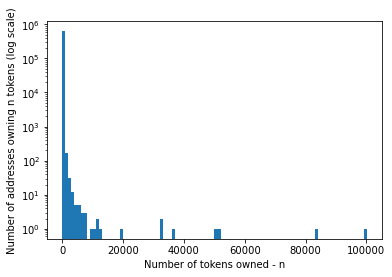

In [25]:
plt.xlabel("Number of tokens owned - n")
plt.ylabel("Number of addresses owning n tokens (log scale)")
_, _, _ = plt.hist(pandas_df["count"], bins=100, log=True)

The overwhelming number of NFT owners each only own a small number of tokens. There are very few addresses that own hundreds or even thousands of tokens. Histogram has been charted on logarithmic scales